# Medidas Electronicas I - R4052
# Trabajo Practico de Laboratorio 1
## Grupo 4
### Fernandez Bados Alejo, Goyret Marcos, Pereira Francisco, Ricciotti Bruno

El objetivo de este trabajo es el de calcular la propagación de la incertidumbre que hay en la medición que realizamos de la tensión de salida de un divisor resistivo. Esta medición la vamos a realizar de 3 maneras diferentes, vamos a calcular la incertidumbre de cada una y al final compararlas y extraer conclusiones.
Los tipos de medición son los siguientes:
1) Medición directa de la tensión de salida.

2) Medición indirecta de la tensión de salida caracterizando los componentes.

3) Usando solo la especificación de los componentes 
Para este experimento utilizamos los siguientes instrumentos:
 - Multímetro genérico.
 - Fuente regulable de tensión simple.
 - Resistencia regulable del Laboratorio y/o Potenciómetros/Resistencias.


# Declaracion de Formulas

In [16]:
import statistics as st
import numpy as np
import math as mt

def incertidumbre_A(X) -> float:
  return st.stdev(X)/mt.sqrt(len(X))

def inecrtidumbre_B(er_p, nd, Ci, Xm) -> float:
  return Xm*((er_p/100)+(nd/Ci))/mt.sqrt(3)

def incertidumbre_total_A_B(uA, uB) -> float:
  return mt.sqrt( uA**2 + uB**2 )

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return mt.trunc(number)

    factor = 10.0 ** decimals
    return mt.trunc(number * factor) / factor

# Procedimiento Especifico de la Medición

### Instrumentos y Componentes usados:

 - Fuente Usada HY3005D https://www.jameco.com/Jameco/Products/ProdDS/301938.pdf

 - Tester Usado DT830 https://datasheetspdf.com/pdf-file/784884/ETC/DT830/1

 - RA=RB=1KΩ con tolerancia de 5%

 - RV=1MΩ, la obtuvimos de la hoja de datos
 
El circuito que armamos en la protoboard para medir es el siguiente:
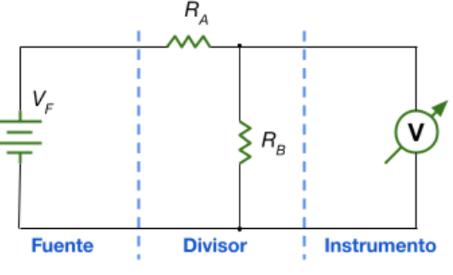
Donde: 
 - Vf: tensión de la fuente = 10V.
 - Ra,Rb: Resistencias pertenecientes al divisor = 992 Ohms medidas con el multímetro.
 - Instrumento: Multimetro DT830 (https://datasheetspdf.com/pdf-file/784884/ETC/DT830/1 ) con resistencia interna de 1Mohm.

El tester lo configuramos para que mida tensión en continua con escala de 20V, colocando el borne del cable negro en común y el rojo en el de continuidad, mientras que la fuente de tensión la colocamos en 10 Volts. 
Una vez armado el circuito, lo conectamos a la fuente de tensión y lo encendimos, colocando las puntas de medición del tester en paralelo a donde deseemos obtener la tensión dependiendo de cada caso, y obtenemos los valores.

Caso 1: En los extremos de la resistencia Rb.

Caso 2: En los extremos de la fuente de alimentación.

Caso 3: No hay medición

### Instrumentos utilizados:
    

## Caso 1
### Valor Medio

In [3]:
Vo1 = [4.99,4.99,5.00,5.00,5.00]
Vo1_med = st.mean(Vo1)
print(f'Valor Medio Vo1: {Vo1_med}')

Valor Medio Vo1: 4.996


### Incertidumbre Tipo A

In [17]:
uA_Vo1 = incertidumbre_A(Vo1)
print(f'Incertidumbre tipo A\nuA_Vo1: {uA_Vo1}')

Incertidumbre tipo A
uA_Vo1: 0.002449489742783126


### Incertidumbre Tipo B
Al calcular las cuentas ci para la medicion, En rango 20V y con un valor medio 4.996 podemos ver que las cuentas indicadas son 499 (En el multimetro se ve 04.99)

In [60]:
nd = 5
er = 0.5
Ci = int(Vo1_med*100) ##Lo vuelvo un entero

uB_Vo1 = inecrtidumbre_B(er, nd, Ci, Vo1_med)
print(f'Incertidumbre tipo B\nuB_Vo1: {uB_Vo1}')

Incertidumbre tipo B
uB_Vo1: 0.04332443362086358


### Incertidumbre Combinada

In [61]:
uc_Vo1 = incertidumbre_total_A_B(uA_Vo1, uB_Vo1)
print(f'Incertidumbre total\nuc_Vo1: {uc_Vo1}')

Incertidumbre total
uc_Vo1: 0.04339362336298519


### Incertidumbre total expandida
Es B dominante, uso tabla de incertidumbre normal/Rectangular y llego a:

In [62]:
Division = uA_Vo1/uB_Vo1  #hay solo 1 valor de medicion, por lo que los coeficientes de sensibilidad se cancelan
print(f'Division: {Division}')

Division: 0.056538298093377376


Por lo que uso un valor de K = 1.65

In [63]:
k95 = 1.65

Uc_ex_Vo1 = uc_Vo1*k95
print(f'Uc_ex_Vo1: {Uc_ex_Vo1}')

Uc_ex_Vo1: 0.07159947854892557


## Caso 2:
Siendo la funcion de medicion: 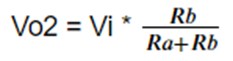 

Como Ra = Rb en este caso, Vo2 = 0.5*Vi

### Valor medio:

In [9]:
Vi = [10.01,10.01,10.01,10.02,10.03]
Vi_med = st.mean(Vi)
R_med = 1000
Vo2_med = 0.5*Vi_med
print(f'Valor Medio Voi: {Vi_med}\nValor medio Vo2: {Vo2_med}')

Valor Medio Voi: 10.016
Valor medio Vo2: 5.008


### Incertidumbre Tipo A

In [10]:
uA_Vi = incertidumbre_A(Vi)
print(f'Incertidumbre tipo A\nuA_Vi: {uA_Vi}')

Incertidumbre tipo A
uA_Vi: 0.003999999999999915


### Incertidumbre Tipo B
Al calcular las cuentas ci para la medicion, en rango 20V y con un valor medio de 10.016 vemos que las cuentas indicadas son 1001 (En el multimetro se ve 10.01)

In [7]:
nd = 5
erVi = 0.5
erR = 5
Ci = int(Vi_med*100) ##Lo vuelvo un entero

uB_Vi = inecrtidumbre_B(erVi, nd, Ci, Vi_med)

## De las resitencias
uB_Ra = inecrtidumbre_B(erR, 0, Ci, R_med) ## Error 5%
uB_Rb = inecrtidumbre_B(erR, 0, Ci, R_med) ## Error 5%

print(f'Incertidumbre tipo B\nuB_Vi: {uB_Vi}\nuB_Ra y nuB_Rb: {uB_Ra}')

Incertidumbre tipo B
uB_Vi: 0.05779851814536857
uB_Ra y nuB_Rb: 28.86751345948129


### Incertidumbre total de Vi

In [11]:
uc_Vi = incertidumbre_total_A_B(uA_Vi, uB_Vi)
uc_Ra = incertidumbre_total_A_B(0, uB_Ra)
uc_Rb = incertidumbre_total_A_B(0, uB_Rb)
print(f'Incertidumbre total\nuc_Vi: {uc_Vi}\nuc_Ra y uc_Rb: {uc_Ra}')

Incertidumbre total
uc_Vi: 0.05793676466459358
uc_Ra y uc_Rb: 28.86751345948129


### Incertidumbre total de Vo2
Para el coeficiente de sensibilidad tengo que derivar Vo2 respecto de Vi 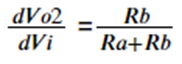
Da como resultado ci(Vo2) = 0.5

Luego tengo que derivar Vo2 respecto de Rb 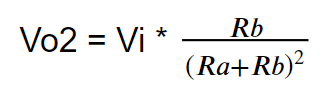
Da como resultado ci(Rb) = 2.504e-3

Y finalmente Vo2 respecto de Ra 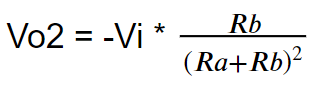
Da como resultado ci(Ra) = -2.504e-3

In [36]:
ci_Vo2 = 0.5
ci_Ra = 0.002504
ci_Rb = 0.002504
uc_Vo2 = mt.sqrt(((ci_Vo2*uc_Vi)**2) + (ci_Ra*uc_Ra)**2 + (ci_Rb*uc_Rb)**2)
print(f'uc_Vo2: {uc_Vo2}')

uc_Vo2: 0.10625061807639893


### Incertidumbre total expandida
Es B dominante, uso tabla de incertidumbre normal/Rectangular y llego a:

In [19]:
Division2 = uA_Vi/uB_Vi
print(f'Division: {Division2}')

Division: 0.06920592652461346


In [20]:
k95 = 1.65

Uc_ex_Vo2 = uc_Vo2*k95
print(f'Uc_ex_Vo2: {Uc_ex_Vo2}')

Uc_ex_Vo2: 0.17531351982605822


## Caso 3:
Para este caso no hay incertidumbre tipo A, solo hay tipo B
Teniendo en cuenta la ecuacion de divisor de tension que se llega en el caso 2, planteando una entrada Vi de 5V y una Ra = Rb, se llega a una tension de salida Vo3 = 5V

In [34]:
## Tomo mismas especificaciones del fabricante que tomé en el caso 1
## Especificaciones de la Fuente: ±1%+2digits
Vo3_med = 5
## Display asumo 3 digitos por lo que Ci muestra 5.00, por lo tanto Ci=500
Ci = int(Vo3_med*100)
er = 1
n = 2
uB_Vo3 = inecrtidumbre_B(er, n, Ci, Vo3_med)

#caso Resistencias es lo mismo que en caso 2
uB_Ra = inecrtidumbre_B(erR, 0, Ci, R_med) ## Error 5%
uB_Rb = inecrtidumbre_B(erR, 0, Ci, R_med) ## Error 5%

print(f'Incertidumbre tipo B\nuB_Vo3: {uB_Vo3}\nuB_Ra y nuB_Rb: {uB_Ra}')

Incertidumbre tipo B
uB_Vo3: 0.04041451884327381
uB_Ra y nuB_Rb: 28.86751345948129


### Incertidumbre total de Vo3
Igual que en caso 2

In [38]:
ci_Vo3 = 0.5
ci_Ra = 0.002504
ci_Rb = 0.002504
uc_Vo3 = mt.sqrt(((ci_Vo3*uB_Vo3)**2) + (ci_Ra*uc_Ra)**2 + (ci_Rb*uc_Rb)**2)
print(f'uc_Vo3: {uc_Vo3}')

uc_Vo3: 0.1042034548371598


### Incertidumbre total expandida
Como no hay incertidumbre tipo a, K = 1.65

In [39]:
k95 = 1.65

Uc_ex_Vo3 = uc_Vo3*k95
print(f'Uc_ex_Vo3: {Uc_ex_Vo3}')

Uc_ex_Vo3: 0.17193570048131365


# Resultados

Vo1 = 4.99 +- 0.072 | K = 1.65 | tipo B dominante (95.45%)

Vo2 = 5.00 +- 0.17 | K = 1.65 | tipo B dominante (95.45%)

Vo3 = 5.00 +- 0.17 | K = 1.65 | tipo B dominante (95.45%)

Como podemos apreciar el orden de las incertidumbres es Vo3 > Vo2 > Vo1, y es un resultado esperado.
Para empezar el resultado nos dice que la incertidumbre tipo A es mucho mas chica que la de tipo B en todos los casos, y esto significa que la medición directa y analisis de incertidumbre por medio de la estadistica es mucho mas precisa que la medicion obtenida de otros datos externos (en este caso).

En el caso de Vo1 realizamos una medicion directa de la tensión de salida, por lo que era mucho mas probable que el valor sea mas preciso que en Vo2 y Vo3, que se miden de forma indirecta a partir de la tensión de entrada y por medio de una funcion de medicion para llegar al valor esperado. Luego está el caso de Vo3, en donde no se realizaron mediciones experimentales mediante un medidor de tension, solamente se calculó su valor por medio de las especificaciones de la fuente y las resistencias y haciendo calculos matematicos, que es el entorno menos preciso posible, por eso su incetidumbre es la mayor de todas (comparada con Vo2 es solo un poco mayor), pero como se puede apreciar en los resultados es aproximadamente igual a Vo2.